In [1]:
import json
import projetannuel

with open("../dataset/images_flat_full.json", "r") as dataset:
    data = json.load(dataset)
    
imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]

In [2]:
import projetannuel

y = projetannuel.string_labels(genres)

model = projetannuel.LinearModel(
    imgs_as_lists,
    y
)

In [3]:
len(imgs_as_lists)

16837

In [ ]:
model.train_classification(epochs=10_000, learning_rate=0.001, algo="gradient-descent")

In [ ]:
model.save("../saved_model/linear_images_20x20_16000im_10000ep_0-001lr.json")

In [6]:
model.save("../saved_model/linear_images_20x20_1200im_10000ep_0-001lr.json")

In [7]:
y_pred = []
for img in imgs_as_lists:
    y_pred.append(model.predict(img))

In [8]:
print(y_pred)

['Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'H

In [9]:
projetannuel.accuracy_score(genres, y_pred)

0.6866666666666666

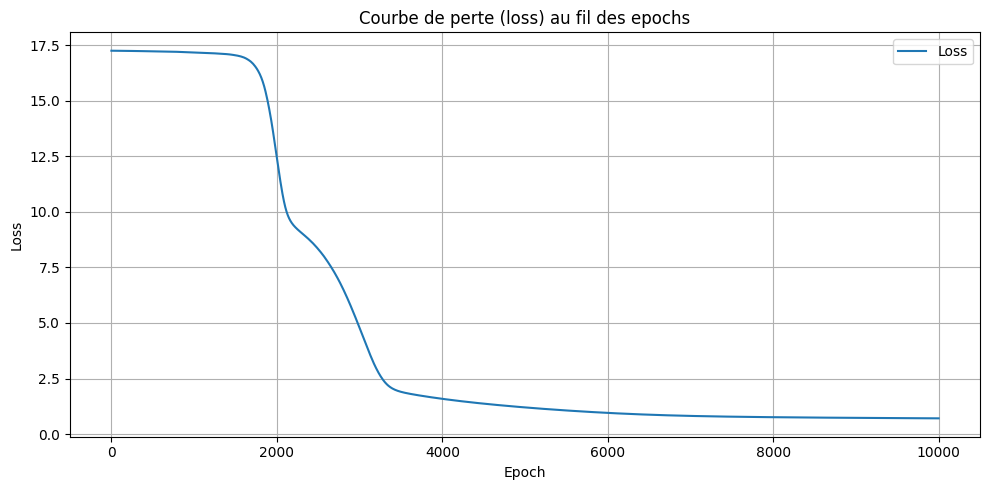

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [11]:
genres_binary = [[0] if x=="Animation" else [1] for x in genres]
len(genres_binary)

1200

In [12]:
import projetannuel as pa
model = pa.MLP([6, 4, 1])
model.train(imgs_as_lists,genres_binary,1_000_000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists]

In [13]:
model.save("../saved_model/mlp_images_20x20_1200im_6-4-1npl_1000000ep_0-01lr.json")

AttributeError: 'builtins.MLP' object has no attribute 'save'

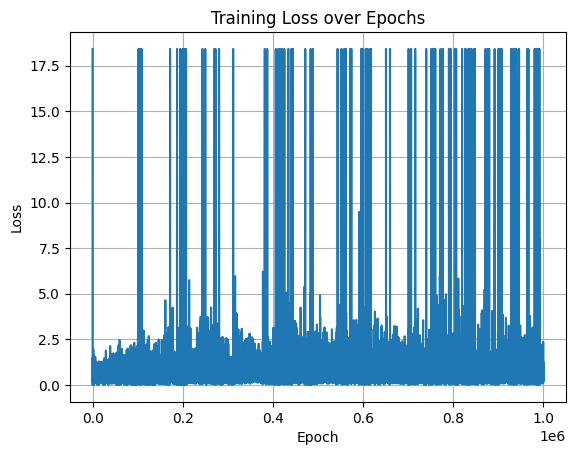

In [14]:
import matplotlib.pyplot as plt

# noraml car affiche pas par epochs

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [15]:
genres_binary_2 = [x[0] for x in genres_binary]

In [16]:
print(y_pred)

[0.5778590100954714, 0.3757630451538445, 0.43083079717190104, 0.5075070847207133, 0.48983438792985723, 0.5379277416772172, 0.4090245274560105, 0.5347675767158778, 0.556151054455119, 0.5895546973149393, 0.42268029469831137, 0.30977453247150555, 0.40959718808881246, 0.40785237441407574, 0.448149943993125, 0.5408629499685688, 0.37031944969411734, 0.5586121779981271, 0.5504221867794147, 0.3861967131576936, 0.39356612988561823, 0.3693119772533646, 0.5617887826900521, 0.5435620288276999, 0.4142250774242359, 0.5280057077988987, 0.4625310543355078, 0.3090466583379828, 0.2467047127035694, 0.5501789568472814, 0.4520985084142948, 0.43033905177960596, 0.4212614516345014, 0.4600689754520053, 0.5343261437084486, 0.5213504005099059, 0.5590756289561438, 0.4293859051423244, 0.4955080703951245, 0.5528511026175187, 0.565002810173727, 0.4892426141266652, 0.41329273621891693, 0.48214817893457584, 0.4643202507117865, 0.3876097578727145, 0.43632085257678327, 0.40136614962026856, 0.32619187059298654, 0.408023

In [17]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

460

In [18]:
pa.accuracy_score(genres_binary_2, y_pred)

0.5683333333333334

# RBF

In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [8]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_as_lists,
#         y,
#         gamma = gamma,
#         k = c
#     )
#     model.train_classification(epochs=10_000, learning_rate=0.01, algo="gradient-descent")
#     Y_pred = [model.predict(x) for x in imgs_as_lists]
#     acc = projetannuel.accuracy_score(genres, Y_pred)
    
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

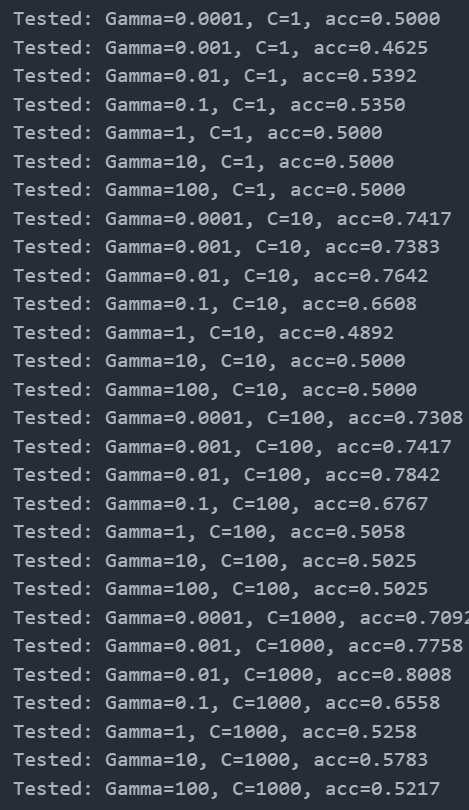

In [26]:
y = projetannuel.string_labels(genres)

model = projetannuel.RBF(
    imgs_as_lists,
    y,
    gamma = 0.01,
    k = 120
)

model.train_classification(epochs=1_000, learning_rate=1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in imgs_as_lists]

# print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

In [27]:
projetannuel.accuracy_score(genres, Y_pred)

0.8008333333333333

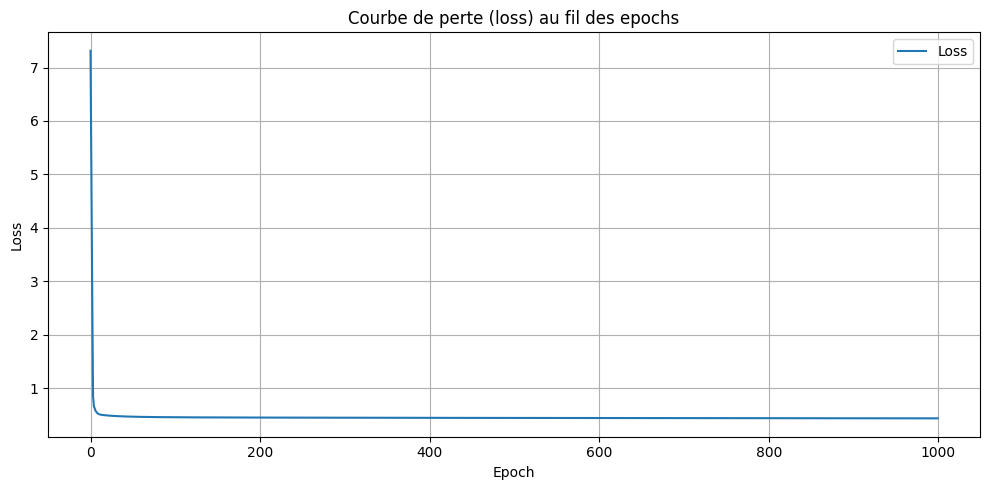

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()